Imports

In [13]:
# Imports

import os
import requests
import json
import pandas as pd
import numpy as np
import alpaca_trade_api as alpaca
from alpaca_trade_api import REST, TimeFrame


Tickers

In [65]:
# Set tickers

tickers = [
    #"ARKK", 
    #"ARKQ", 
    "AXP", 
    "FB", 
    "HD", 
    "JPM", 
    "MA", 
    #"NLS", 
    "TSLA", 
    "UAL", 
    "UBER", 
    #"VALE",
    "F",
    "EOG",
    "TWTR"
]

Connection

In [3]:
# Set the variables for the Alpaca API and secret keys

connection = REST()


Close prices Function

In [72]:


timeframe = "1D"


def get_close_prices(ticker):
    prices=connection.get_barset(
    ticker, 
    timeframe, 
    start=2019-6-1, 
    end=2021-12-22
).df

    prices = prices.xs("close", level=1, axis="columns")

    return(pd.DataFrame(prices))
    
close_prices = get_close_prices(tickers)

close_prices
    

,AXP,EOG,F,FB,HD,JPM,MA,TSLA,TWTR,UAL,UBER
time,,,,,,,,,,,
2021-08-04 00:00:00-04:00,168.08,70.73,13.320,358.86,330.32,151.230,368.00,710.91,68.720,45.28,41.8000
2021-08-05 00:00:00-04:00,169.63,70.72,13.710,362.97,333.04,153.150,371.94,714.63,69.280,47.23,43.0700
2021-08-06 00:00:00-04:00,171.33,70.93,13.790,363.49,329.84,157.497,374.74,698.89,67.380,47.62,44.2801
2021-08-09 00:00:00-04:00,170.78,69.38,13.760,361.61,328.65,157.331,370.68,713.73,67.015,46.45,43.2434
2021-08-10 00:00:00-04:00,169.50,68.73,13.810,361.13,331.51,159.250,367.81,709.99,65.670,47.68,43.5000
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-17 00:00:00-05:00,160.00,84.02,19.770,334.05,387.90,156.780,349.30,931.15,43.070,40.78,39.6700
2021-12-20 00:00:00-05:00,155.88,83.56,19.420,325.62,389.53,153.950,337.29,900.10,42.990,41.10,39.7000
2021-12-21 00:00:00-05:00,160.97,86.37,19.620,334.25,390.51,156.100,350.83,938.41,44.370,43.94,41.9800


Plot close prices

<AxesSubplot:xlabel='time'>

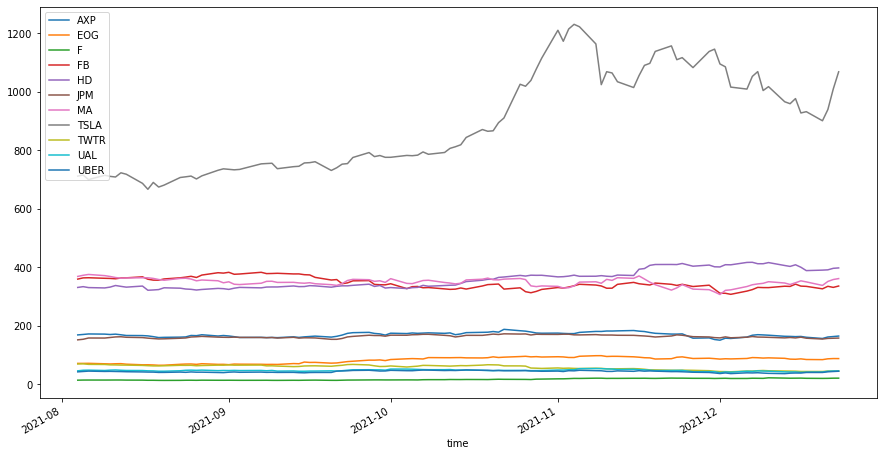

In [67]:
close_prices.plot(
    figsize=(15,8)
)

Returns

In [68]:
# Calculate the aggregate daily returns

returns = close_prices.pct_change().dropna()

returns


# Calculate the annualized average return data

returns_annualized = returns.mean() * 252

returns_annualized.sort_values()


TWTR   -1.052088
FB     -0.133350
AXP    -0.013795
MA     -0.001531
UAL     0.075831
JPM     0.120349
UBER    0.236041
HD      0.490181
EOG     0.600495
F       1.146290
TSLA    1.169136
dtype: float64

Standard Deviation

In [69]:
# Calculate the standard deviation

std = returns.std()

std


# Calculate the annualized standard deviation (252 trading days)

std_annualized = (std * np.sqrt(252))

std_annualized.sort_values()


JPM     0.205122
HD      0.207449
FB      0.284962
AXP     0.304775
MA      0.318014
EOG     0.374894
TWTR    0.375827
F       0.399716
UAL     0.449204
UBER    0.476225
TSLA    0.517075
dtype: float64

Sharpe Ratio

In [70]:
# Calculate the annualized Sharpe Ratios

sharpe_ratio = returns_annualized / std_annualized

sharpe_ratio.sort_values()


TWTR   -2.799394
FB     -0.467958
AXP    -0.045264
MA     -0.004816
UAL     0.168813
UBER    0.495650
JPM     0.586720
EOG     1.601773
TSLA    2.261059
HD      2.362903
F       2.867759
dtype: float64